In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls "/content/gdrive/My Drive/Traffic-Signal-Classification-Using-Deep-Learning"

ls: cannot access '/content/gdrive/My Drive/Traffic-Signal-Classification-Using-Deep-Learning': No such file or directory


- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons


IMPORT LIBRARIES/DATASETS

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
with open("./gdrive/My Drive/Traffic-Signal-Classification/dataset/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./gdrive/My Drive/Traffic-Signal-Classification/dataset/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./gdrive/My Drive/Traffic-Signal-Classification/dataset/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [6]:
x_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

PERFORM IMAGES VISUALIZATION

13

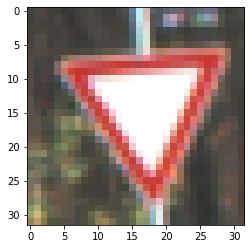

In [8]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

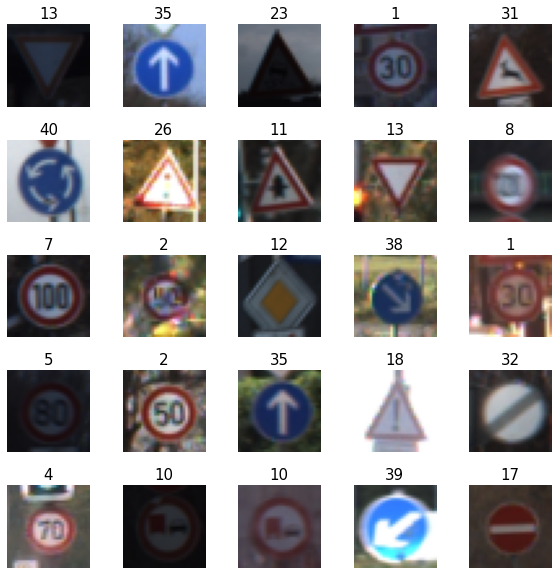

In [9]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
    # Select a random number
    index= np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [10]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [11]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis=3, keepdims=True)

In [12]:
x_train_gray.shape

(34799, 32, 32, 1)

In [13]:
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128

In [14]:
x_train_gray_norm

array([[[[-0.90104167],
         [-0.91145833],
         [-0.9140625 ],
         ...,
         [-0.92447917],
         [-0.91666667],
         [-0.921875  ]],

        [[-0.89583333],
         [-0.91145833],
         [-0.90625   ],
         ...,
         [-0.91145833],
         [-0.90104167],
         [-0.921875  ]],

        [[-0.8984375 ],
         [-0.90625   ],
         [-0.90625   ],
         ...,
         [-0.91666667],
         [-0.91666667],
         [-0.921875  ]],

        ...,

        [[-0.8671875 ],
         [-0.87760417],
         [-0.8828125 ],
         ...,
         [-0.91927083],
         [-0.92447917],
         [-0.9140625 ]],

        [[-0.87239583],
         [-0.8828125 ],
         [-0.87239583],
         ...,
         [-0.92447917],
         [-0.91666667],
         [-0.9140625 ]],

        [[-0.86458333],
         [-0.875     ],
         [-0.8828125 ],
         ...,
         [-0.921875  ],
         [-0.921875  ],
         [-0.90364583]]],


       [[[ 0.91666667],


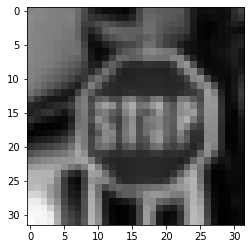

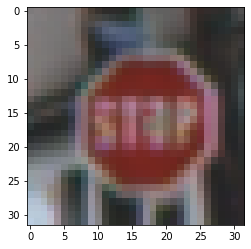

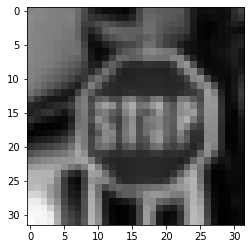

In [15]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [16]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu',))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [17]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
%%time
history = CNN.fit(x_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (x_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 1s 15ms/step - loss: 3.2236 - accuracy: 0.1548 - val_loss: 2.8889 - val_accuracy: 0.2488
Epoch 2/50
70/70 [==============================] - 1s 10ms/step - loss: 2.0872 - accuracy: 0.4240 - val_loss: 1.7793 - val_accuracy: 0.4748
Epoch 3/50
70/70 [==============================] - 1s 10ms/step - loss: 1.3179 - accuracy: 0.6109 - val_loss: 1.1625 - val_accuracy: 0.6397
Epoch 4/50
70/70 [==============================] - 1s 10ms/step - loss: 0.9159 - accuracy: 0.7273 - val_loss: 0.8444 - val_accuracy: 0.7506
Epoch 5/50
70/70 [==============================] - 1s 10ms/step - loss: 0.7347 - accuracy: 0.7819 - val_loss: 0.7233 - val_accuracy: 0.7853
Epoch 6/50
70/70 [==============================] - 1s 10ms/step - loss: 0.6231 - accuracy: 0.8155 - val_loss: 0.6781 - val_accuracy: 0.7991
Epoch 7/50
70/70 [==============================] - 1s 10ms/step - loss: 0.5415 - accuracy: 0.8384 - val_loss: 0.5909 - val_accuracy: 0.8231
Epoch 8/50
70

ASSESS TRAINED CNN MODEL PERFORMANCE 

In [19]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.6752 - accuracy: 0.8963
Test Accuracy: 0.8962786793708801


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

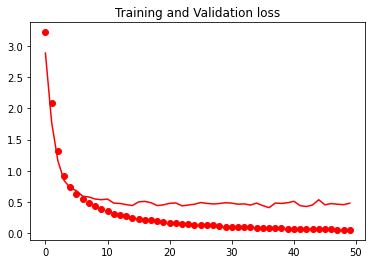

In [22]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

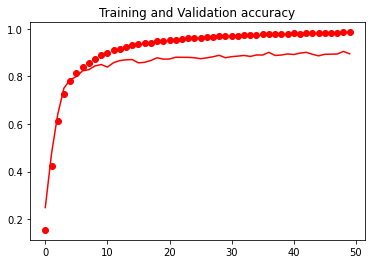

In [23]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


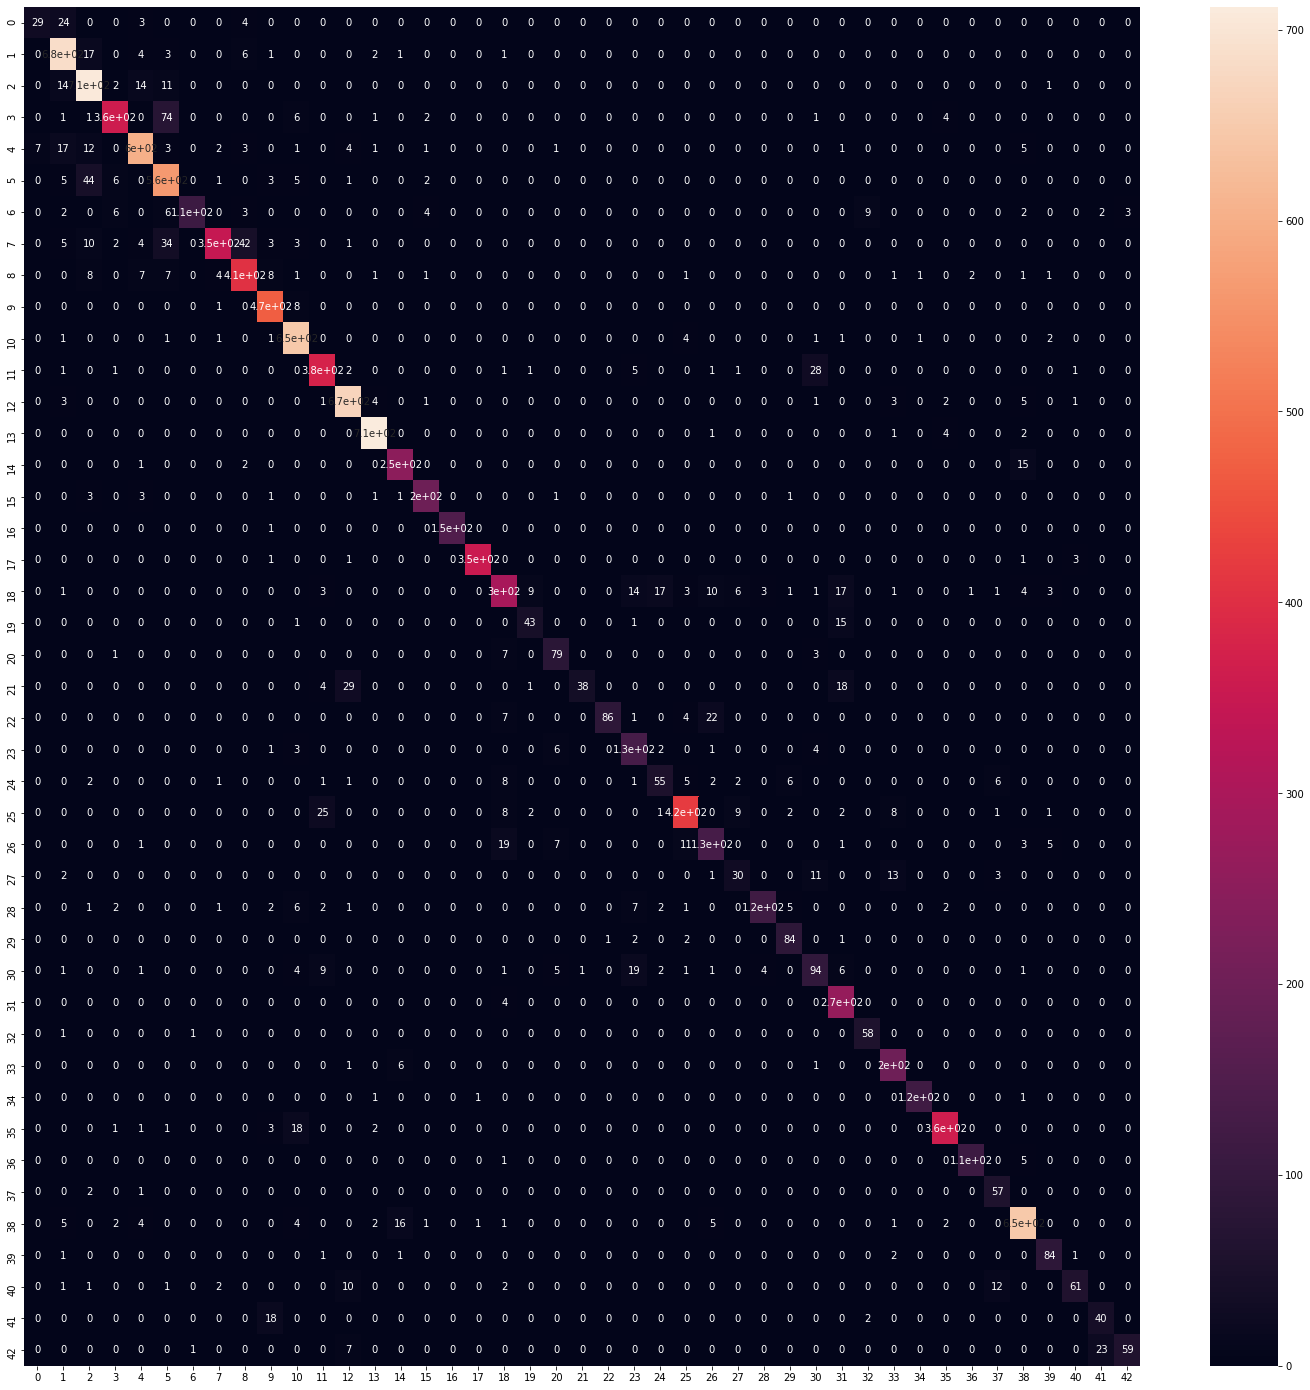

In [24]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

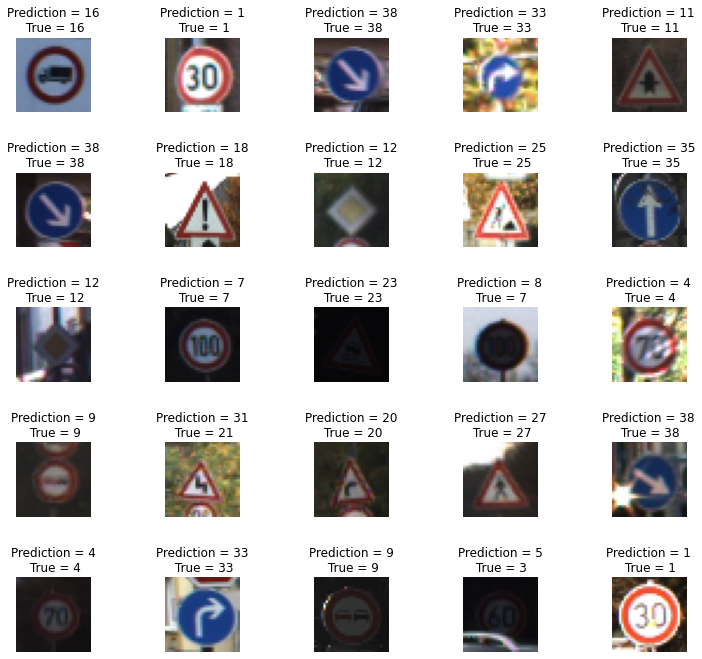

In [25]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)